<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/unsupervised/k-means_vs_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

Adapted from
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [0]:
import numpy as np
from sklearn import datasets

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


In [0]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

def plot_dataset(X, y_pred=[0], fname=None):
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # last color is black to properly display label -1 as noise (black)
    colors = np.append(np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1)))), ['#000000'])
    plt.figure(figsize=(10, 10))

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    if fname:
        plt.savefig(fname)


In [0]:
# plt.scatter?

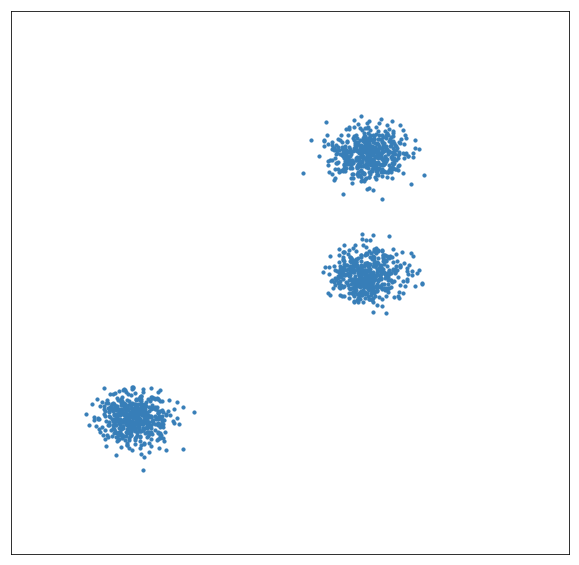

In [5]:
X, y = blobs
# plot_dataset(X, fname='blobs.png')
plot_dataset(X)

## K Means

In [6]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
y_pred = clf.predict(X)
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

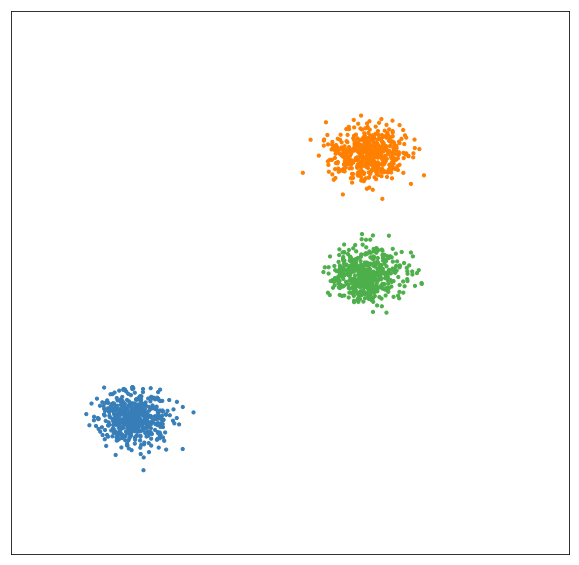

In [8]:
# plot_dataset(X, y_pred, fname='blobs_kmeans_3')
plot_dataset(X, y_pred)

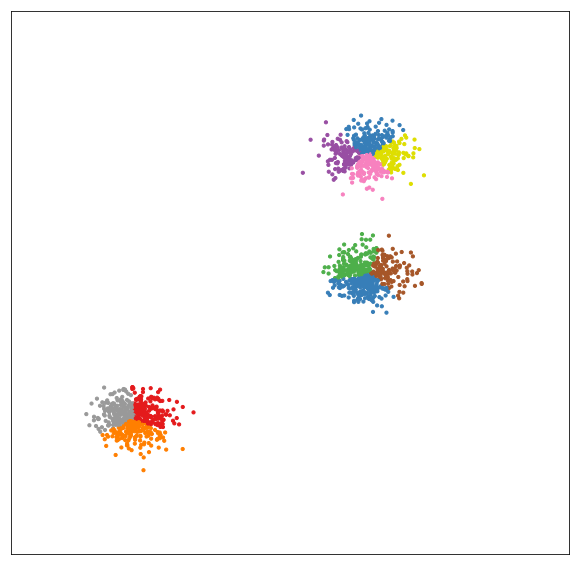

In [9]:
# from sklearn.cluster import MiniBatchKMeans
# clf = MiniBatchKMeans(n_clusters=10)

clf = KMeans(n_clusters=10)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='blobs_kmeans_10')
plot_dataset(X, y_pred)

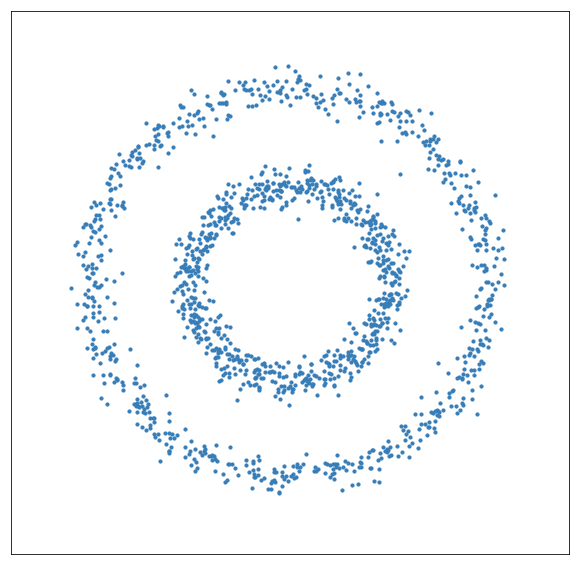

In [10]:
X, y = noisy_circles
# plot_dataset(X, fname='noisy_circles.png')
plot_dataset(X)

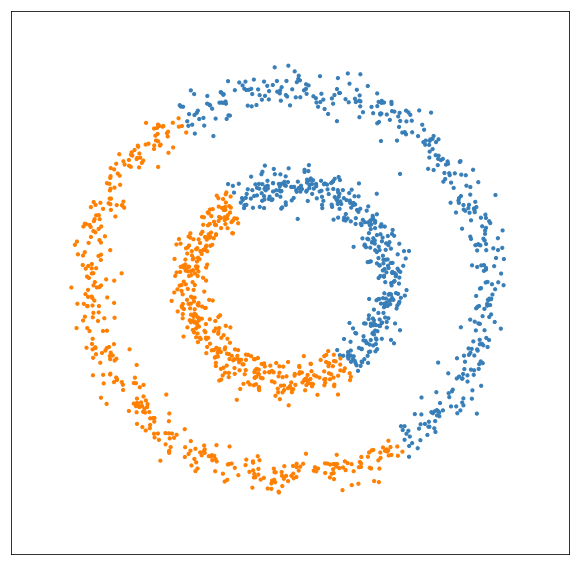

In [11]:
clf = KMeans(n_clusters=2)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='noisy_circles_kmeans.png')
plot_dataset(X, y_pred)

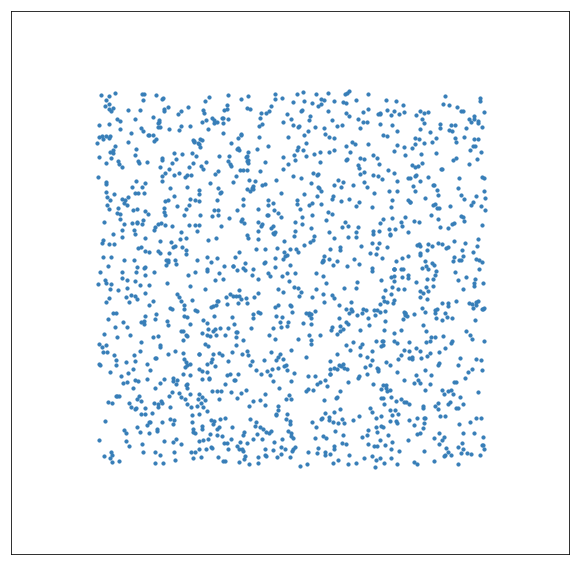

In [12]:
X, y = no_structure
# plot_dataset(X, fname='no_structure.png')
plot_dataset(X)

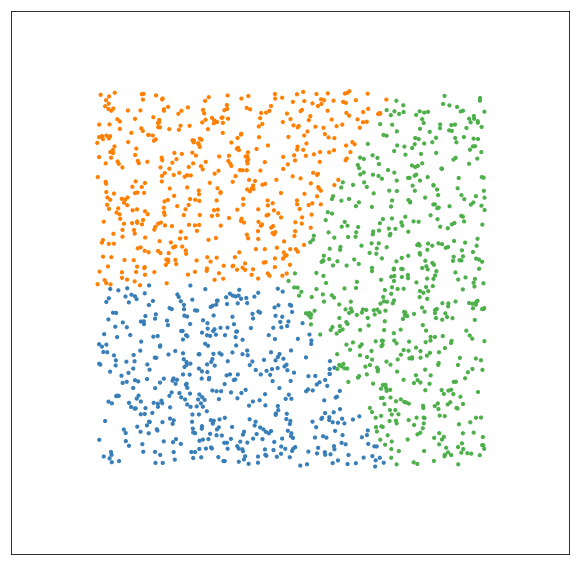

In [13]:
clf = KMeans(n_clusters=3)
clf.fit(X)
y_pred = clf.predict(X)
# plot_dataset(X, y_pred, fname='no_structure_kmeans.png')
plot_dataset(X, y_pred)

## DBSCAN 

In [0]:
# DBSCAN?

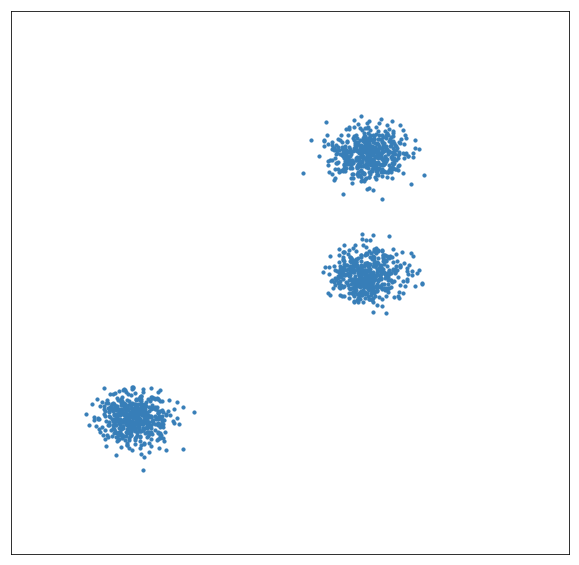

In [15]:
X, y = blobs
plot_dataset(X)

In [16]:
from sklearn.cluster import DBSCAN

clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

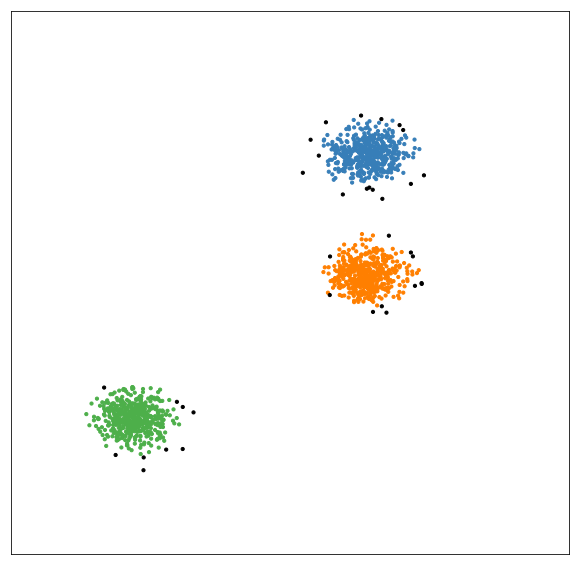

In [17]:
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='blobs_dbscan')
plot_dataset(X, y_pred)

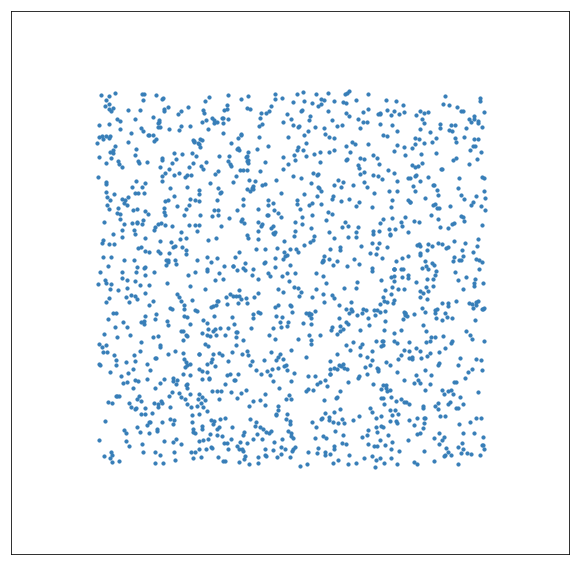

In [18]:
X, y = no_structure
plot_dataset(X)

In [19]:
clf.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

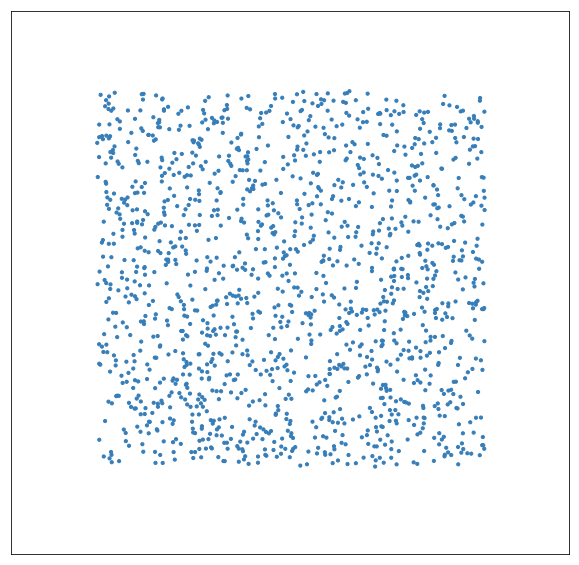

In [20]:
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='no_structure_dbscan')
plot_dataset(X, y_pred)

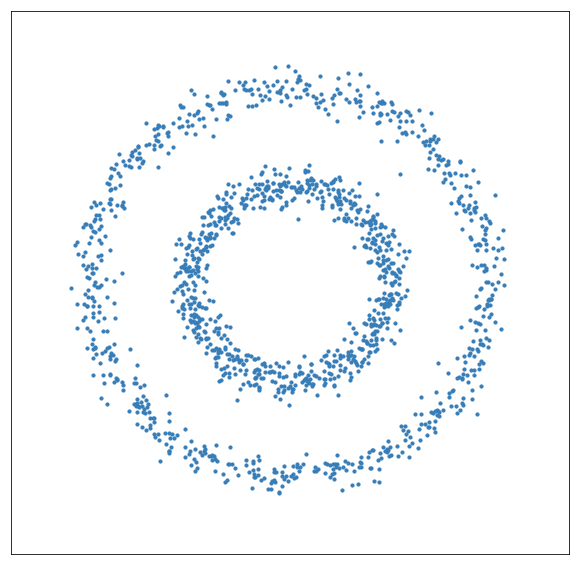

In [21]:
X, y = noisy_circles
plot_dataset(X)

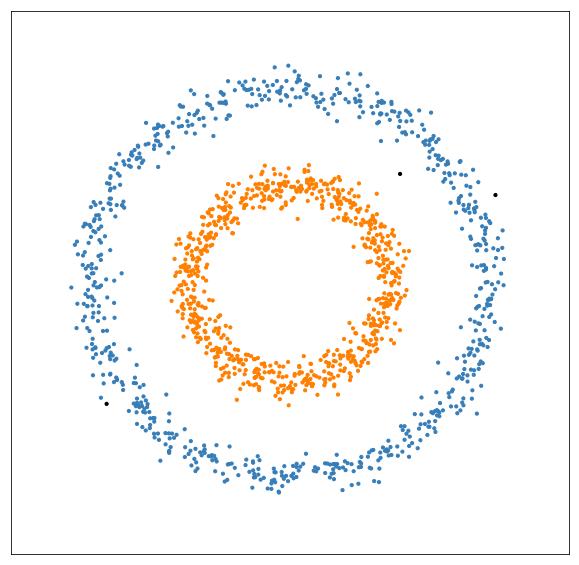

In [22]:
clf = DBSCAN(eps=0.1)
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='noisy_circles_dbscan')
plot_dataset(X, y_pred)

## Metrics

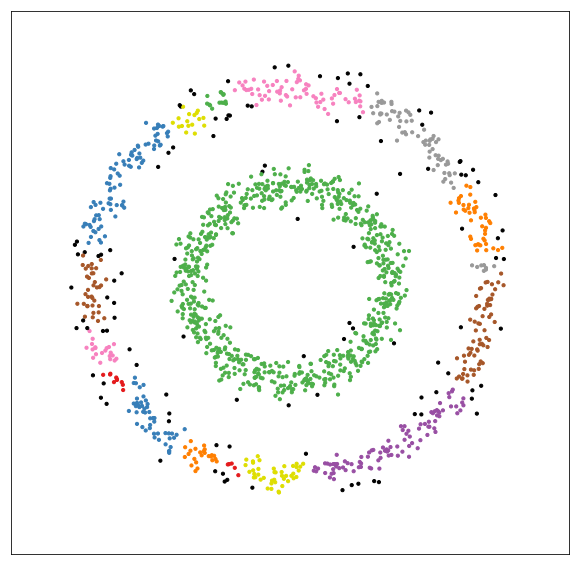

In [23]:
clf = DBSCAN(eps=0.05)
clf.fit(X)
y_pred = clf.labels_.astype(np.int)
# plot_dataset(X, y_pred, fname='noisy_circles_dbscan')
plot_dataset(X, y_pred)

In [24]:
labels = clf.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

19

In [25]:
labels

array([ 0,  1,  2, ...,  2,  8, -1])

In [26]:
contains_noise = -1 in labels
contains_noise

True

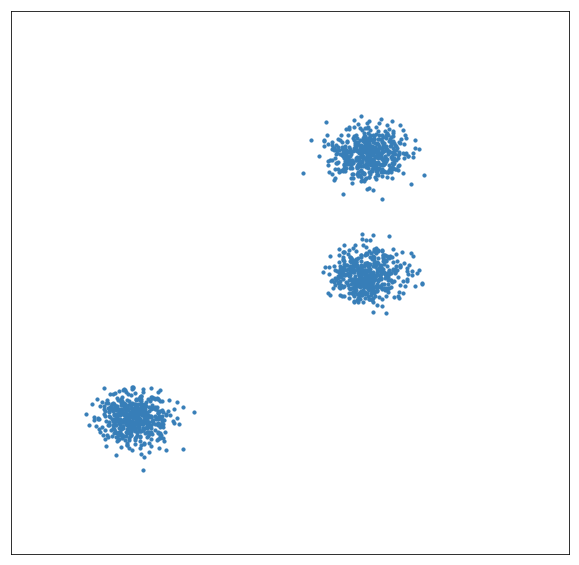

In [27]:
X, y = blobs
plot_dataset(X)

In [28]:
# eps is the maximum distance per two points to still be in the same neighborhood
# min_samples minimum amout of samples to form a cluster
clf = DBSCAN(eps=1.5)
# clf = DBSCAN()
clf.fit(X)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
# DBSCAN?

In [30]:
unique_labels = set(clf.labels_)
unique_labels

{0, 1, 2}

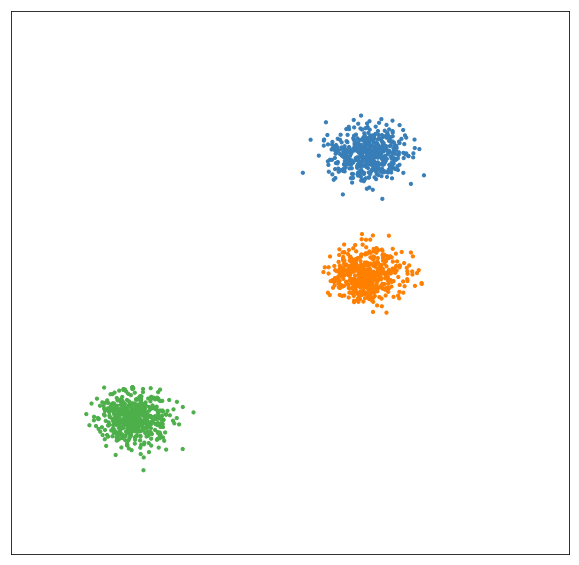

In [31]:
y_pred = clf.labels_.astype(np.int)
plot_dataset(X, y_pred)

In [32]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
n_clusters

3

In [33]:
contains_noise = -1 in clf.labels_
contains_noise

False

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y_pred)

0.8290743874701529

In [0]:
# 1 is great, -1 is worst, around 0 overlapping clusters
# silhouette_score?

In [36]:
from sklearn.metrics import calinski_harabaz_score
calinski_harabaz_score(X, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


37203.36303934007

In [0]:
# calinski_harabaz_score?

## HDBSCAN

* no parameters at all
* like DBSCAN
* but finds out epsilon by itself

https://github.com/scikit-learn-contrib/hdbscan

https://umap-learn.readthedocs.io/en/latest/faq.html#can-i-cluster-the-results-of-umap



In [0]:
!pip install -q hdbscan

In [41]:
import hdbscan

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
X, y = blobs
clf = hdbscan.HDBSCAN()
y_pred = clf.fit_predict(X)
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([500, 500, 500]))

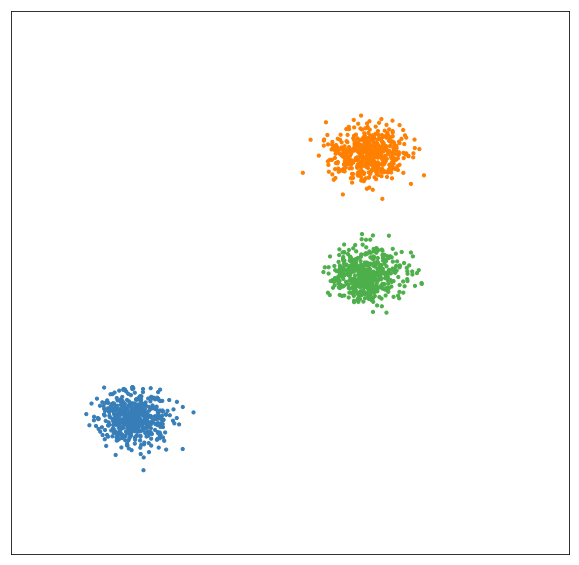

In [57]:
plot_dataset(X, y_pred)

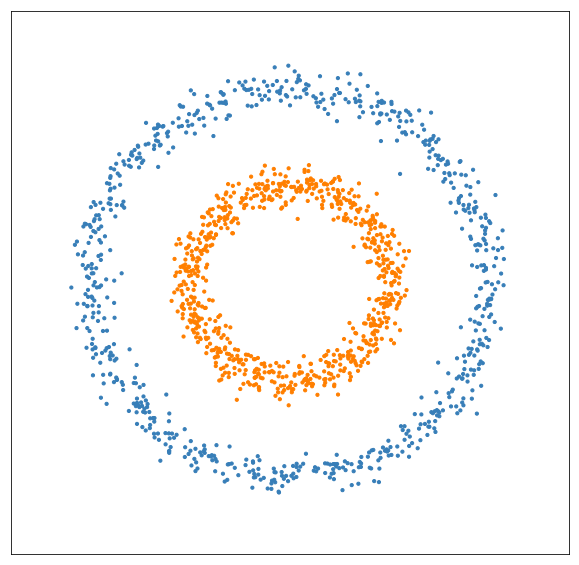

In [58]:
X, y = noisy_circles
clf = hdbscan.HDBSCAN()
y_pred = clf.fit_predict(X)
np.unique(y_pred, return_counts=True)
plot_dataset(X, y_pred)